In [1]:
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create a file path
census_data = pd.read_csv("Resources/census_data_clean_19_22_medgross.csv")

# Read in the data. 
census_data.head()

,Owner_Occupied_Units,Owner_White_alone,Owner_Black_African_American_alone,Owner_American_Indian_Alaska_Native_alone,Owner_Asian_alone,Owner_Native_Hawaiian_Other_Pacific_Islander_alone,Owner_Some_other_race_alone,Owner_Two_or_more_races,Owner_White_no_Hispanic_or_Latino,Owner_Hispanic_Latino,...,Black_African_American,American_Indian_Alaska_Native,Asian,Native_Hawaiian_Other_Pacific_Islander,Other_Race,Two_More_Races,Count_Inds_Income_Past_12_Mos_<_Pov_Level,state,Zip_code,year
0,265,265,0,0,0,0,0,0,265,0,...,0,0,0,0,0,0,771,NaN,40771,2020
1,418,398,0,3,0,0,8,9,398,11,...,0,3,0,0,16,16,166,NaN,73547,2020
2,352,352,0,0,0,0,0,0,344,8,...,21,0,0,0,0,0,156,NaN,58788,2021
3,333,333,0,0,0,0,0,0,333,0,...,19,0,0,0,0,0,118,NaN,58788,2022
4,7,7,0,0,0,0,0,0,7,0,...,0,0,0,0,0,0,8,30.0,59025,2019


In [3]:
# Median household income over time
# Group by year and calculate the mean owner-occupancy rate for each year
median_gross_rent = census_data.groupby('year')['Median_Gross_Rent'].median()
median_gross_rent

year
2019    814.0
2020    831.0
2021    871.0
2022    944.0
Name: Median_Gross_Rent, dtype: float64

R-squared: 0.9214


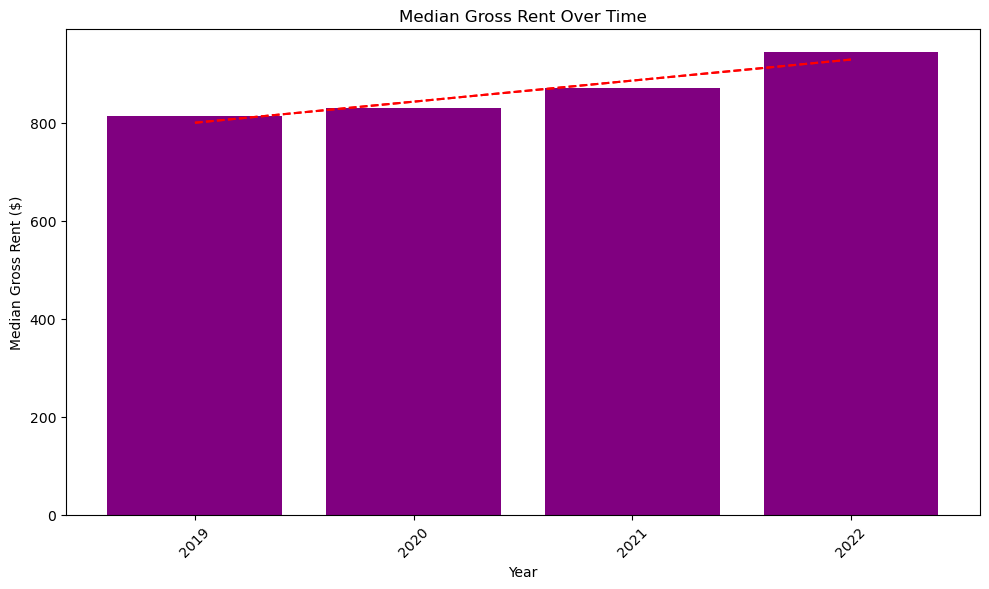

In [5]:
# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(median_gross_rent.index, median_gross_rent.values, color='purple')
plt.xlabel('Year')
plt.ylabel('Median Gross Rent ($)')
plt.title('Median Gross Rent Over Time')
plt.xticks(median_gross_rent.index, rotation=45)
plt.tight_layout()

# Fit a regression line
x = median_gross_rent.index
y = median_gross_rent.values
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
trendline = polynomial(x)

# Plot the regression line
plt.plot(x, trendline, color='red', linestyle='--', label='Trend Line')

# Calculate R-squared value
y_pred = trendline
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)
print(f"R-squared: {r_squared:.4f}")

# Plot the regression line
plt.plot(x, trendline, color='red', linestyle='--', label='Trend Line')

# Save the plot as a file
plt.savefig('median_gross_rent_over_time19_22.png', format='png', dpi=300)

# Show the plot
plt.show()